In [1]:
# data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
plt.style.use('fivethirtyeight')

# modeling
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Filter the Restaurant Opens in 2018

We firstly removed all
closed businesses in the 2018_business dataset to make sure all
businesses in the dataset were still open till 2020.

In [4]:
bus2018=pd.read_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/Raw Matched Data 2018-2020/2018_yelp_business_matched.csv')
bus2018

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
4,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58580,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,113,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."
58581,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
58582,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'BikeParking': 'True', 'RestaurantsAttire': ""...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
58583,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,1,"{'GoodForKids': 'True', 'WiFi': ""u'no'"", 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."


In [5]:
bus2020=pd.read_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/Raw Matched Data 2018-2020/2020_yelp_business_matched.csv')
bus2020

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,145,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Chinese, Specialty Food, Dim Sum, Imported Foo...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,196,1,"{'NoiseLevel': ""u'average'"", 'Caters': 'False'...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,2.5,25,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Restaurants, Breakfast & Brunch, Fast Food, Me...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,15,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Italian, Chicken Wings, Restaurants, Pizza","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
4,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,41,0,"{'OutdoorSeating': 'False', 'BusinessParking':...","Italian, Restaurants",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58580,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,126,0,"{'RestaurantsReservations': 'True', 'GoodForKi...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."
58581,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,29,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Restaurants, Burgers, American (New), Fast Food","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
58582,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'Caters': 'True', 'RestaurantsTakeOut': 'True...","Restaurants, Caribbean, Chinese, Soup","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
58583,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,26,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Restaurants, Vietnamese, Soup","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."


In [6]:
bus2018['business_id'].count()

58585

In [7]:
bus2018.loc[bus2018['is_open']]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."


In [8]:
bus2018open = bus2018.loc[~(bus2018['is_open']==0)]
bus2018open.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
5,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,PA,15231,40.496177,-80.246011,4.0,35,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Sandwiches, Salad, Restaurants, Burgers, Comfo...",NaN


In [9]:
bus2018open['business_id'].count()

41718

# Join the is_open Column in 2020

In [10]:
openid_2018 = bus2018open[['business_id']]
bus_2020 = openid_2018.merge(bus2020, on='business_id')

In [11]:
bus_2020['business_id'].count()

41718

In [12]:
is_open2020 = bus_2020[['is_open']]
is_open2020.rename({'is_open': 'is_open2020'}, axis=1, inplace=True)
is_open2020['is_open2020'].value_counts()

1    38786
0     2932
Name: is_open2020, dtype: int64

In [13]:
bus2018open.drop('is_open', axis=1, inplace=True)

In [14]:
bus_join = bus2018open.join(is_open2020)
bus_join

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open2020
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1.0
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1.0
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1.0
5,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,PA,15231,40.496177,-80.246011,4.0,35,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Sandwiches, Salad, Restaurants, Burgers, Comfo...",NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58580,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,113,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Restaurants, Thai","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ...",NaN
58581,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Burgers, Restaurants, Fast Food, American (New)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",NaN
58582,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,"{'BikeParking': 'True', 'RestaurantsAttire': ""...","Restaurants, Soup, Chinese, Caribbean","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...",NaN
58583,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,Montréal,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,"{'GoodForKids': 'True', 'WiFi': ""u'no'"", 'Rest...","Vietnamese, Soup, Restaurants","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",NaN


In [15]:
bus_join.isnull().sum()

business_id         0
name                0
address           298
city                0
state               0
postal_code        82
latitude            0
longitude           0
stars               0
review_count        0
attributes       1694
categories          0
hours            7470
is_open2020     12036
dtype: int64

In [16]:
bus_join['is_open2020'].value_counts()

1.0    27619
0.0     2063
Name: is_open2020, dtype: int64

In [17]:
# closed restaurant
bus_join.loc[bus_join['is_open2020']==0]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open2020
22,i_oghUPqLzzJtxC6Zm-D2A,Braseiro,8261 Saint-Laurent Boulevard,Montréal,QC,H2P 2M1,45.539733,-73.633639,4.0,22,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Canadian (New), Portuguese, Restaurants","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",0.0
45,c35qzLN6ItDpVIoj2uQW4Q,Ravi Soups,322 Adelaide Street W,Toronto,ON,M5V 1R1,43.647585,-79.392032,4.5,332,"{'Alcohol': ""u'beer_and_wine'"", 'BikeParking':...","Soup, Restaurants, Sandwiches","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0.0
47,jwHtNvHBPafiAwM92jM8yA,Little Caesars Pizza,"2277 10th Line, Suite 3",Whitchurch-Stouffville,ON,L4A 6B6,43.999428,-79.236888,4.0,3,NaN,"Restaurants, Pizza",NaN,0.0
75,U3-kxz7NWq4ix4bPmKKQ0w,Aladdin's Eatery,8870 Mentor Ave,Mentor,OH,44060,41.673859,-81.322821,4.5,47,"{'Ambience': ""{'romantic': False, 'intimate': ...","Ethnic Food, Specialty Food, Food, Restaurants...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",0.0
76,z3csSfd-UBMP1Gk6zHY_AA,Toad N Turtle Pubhouse & Grill,"5155 130th Avenue SE, Suite 100",Calgary,AB,T2Z,50.931938,-113.961610,2.5,24,"{'Caters': 'False', 'WiFi': ""'free'"", 'Ambienc...","Bars, Pubs, Gastropubs, Nightlife, Restaurants...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41603,f9PFMqQqVL3RHtlI-6VJcw,Tim Hortons,4901 Steeles Avenue W,North York,ON,M9L 2W1,43.770542,-79.542779,2.0,8,"{'GoodForKids': 'True', 'RestaurantsReservatio...","Food, Coffee & Tea, Sandwiches, Restaurants, C...",NaN,0.0
41649,jVXa8Qzn5BehtN2iEVJNHw,Mariscos Ensenada,4130 N 27th Ave,Phoenix,AZ,85017,33.495861,-112.117499,3.5,6,"{'RestaurantsDelivery': 'False', 'BusinessPark...","Mexican, Restaurants",NaN,0.0
41661,vQGZjrDiDBuznOkUevBNzw,Los Vietnamita Taqueria Shop,NaN,Toronto,ON,M5B,43.653133,-79.382928,4.5,4,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, Tacos, Asian Fusion, Mexican, Vie...",NaN,0.0
41676,MD4Pa7A3EyQDwscwCQqnmQ,Rubio's,"7400 S Las Vegas Blvd, Unit 22",Las Vegas,NV,89123,36.054912,-115.168477,3.5,17,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Seafood, Mexican, Event Planning & Services, C...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0.0


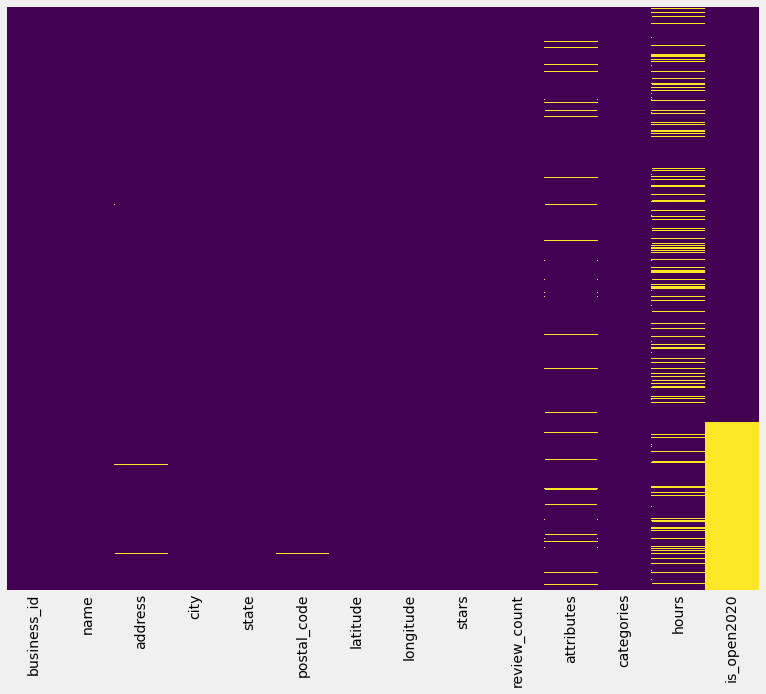

In [18]:
plt.figure(figsize=(12,10))
f = sns.heatmap(bus_join.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

# Deal with Missing Target Label: is_open2020

Set the last day for all closed restaurants to have reviews as standard date, and apply this date to check if the missing-label store have any review after this date. If yes, we consider these restaurants as open.

In [19]:
rev2020 = pd.read_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/Raw Matched Data 2018-2020/2020_yelp_review_matched.csv')
rev2020.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,QXAEGFB4oINsVuTFxEYKFQ,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,3,2,0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,QXAEGFB4oINsVuTFxEYKFQ,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3.0,0,0,0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
2,QXAEGFB4oINsVuTFxEYKFQ,_Hr9z8pJ5nZSf7FS1O8ujw,R-xGsTpwlwuOe_vAbg_aeA,2.0,2,0,1,"Despite the poor service here, my family comes...",2015-02-24 04:32:58
3,QXAEGFB4oINsVuTFxEYKFQ,4Sg_ziTcrYlGO0dVyj2V3g,agqWketq-FhYwVmRyli4jA,1.0,2,0,0,I went at 230 on a Monday. It was dimsum \n\nI...,2017-01-02 20:32:29
4,QXAEGFB4oINsVuTFxEYKFQ,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3.0,0,0,0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30


In [20]:
# find the standard date
busid_close = pd.DataFrame(bus_join.loc[bus_join['is_open2020']==0, 'business_id'])
close_rev = busid_close.merge(rev2020, on='business_id')
close_rev['date'].max()

'2019-12-13 15:35:41'

In [21]:
# find the missing-label business_id
lab_miss = pd.DataFrame(bus_join['is_open2020'].isnull())
df_miss = lab_miss.join(bus_join['business_id'])
busid_miss = pd.DataFrame(df_miss.loc[df_miss['is_open2020']==True, 'business_id'])
busid_miss

,business_id
41718,WBqeV--xN0OjCPzeky4CcQ
41719,Nf9YGbWIwNMEv41J52g3tQ
41720,f-3pzME2p7NDYptFM_SbiA
41721,rFs6RvMB5QYR1WwPCtchiw
41722,IbM5QRE49iYflclZ2WBpEA
...,...
58580,oS0CnUbyv0GUoD3L8_3UPQ
58581,ghovD5ZTGDQ5Q2U4ERddWw
58582,h3QErqS3OZgLJ5Tb6-sLyQ
58583,KnafX7T6qSAmSrLhd709vA


In [22]:
# filter missing-label restaurants that have reviews after standard date
miss_rev = busid_miss.merge(rev2020, on='business_id')
miss_rev['date'].max()

'2019-12-13 15:50:11'

In [23]:
miss_open = pd.DataFrame(miss_rev.loc[miss_rev['date']>'2019-12-13 15:35:41', 'business_id'])

In [24]:
miss_open

,business_id
634266,AE80fzfVnsyeHiiVhwSGMw
763448,WHiND6UPxr6WzgGhz2E91Q


So we find two missing-label restaurants that can be considered as open.

In [25]:
# change the target label of this two restaurants
bus_join.loc[bus_join.business_id =='AE80fzfVnsyeHiiVhwSGMw','is_open2020']=1
bus_join.loc[bus_join.business_id =='WHiND6UPxr6WzgGhz2E91Q','is_open2020']=1

In [26]:
bus_join.loc[bus_join.business_id =='AE80fzfVnsyeHiiVhwSGMw',]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open2020
50225,AE80fzfVnsyeHiiVhwSGMw,Deluxburger Express,3588-3964 E Sky Harbor Blvd,Phoenix,AZ,85034,33.437361,-112.001836,2.5,93,"{'WiFi': ""u'free'"", 'Alcohol': ""'none'"", 'Busi...","Restaurants, Burgers",NaN,1.0


In [27]:
bus_join.loc[bus_join.business_id =='WHiND6UPxr6WzgGhz2E91Q',]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open2020
51883,WHiND6UPxr6WzgGhz2E91Q,Hash Kitchen,"2855 W Ray Rd, Ste 3",Chandler,AZ,85224,33.319932,-111.890247,4.0,240,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Restaurants, Breakfast & Brunch","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...",1.0


In [28]:
# discard missing-label restaurants
bus_join_cleaned = bus_join.loc[(bus_join.is_open2020 == 1)|(bus_join.is_open2020 == 0),]
bus_join_cleaned['is_open2020'].value_counts()

1.0    27621
0.0     2063
Name: is_open2020, dtype: int64

# Filter out State with Only One Record

In [31]:
bus_join_cleaned['state'].value_counts()

ON     7406
AZ     5403
NV     3612
QC     3060
OH     2981
NC     2199
PA     2081
AB     1601
WI      821
IL      323
SC      181
NY       10
NE        1
CA        1
WA        1
BC        1
VT        1
XWY       1
Name: state, dtype: int64

In [35]:
bus_join_cleaned = bus_join_cleaned.drop(bus_join_cleaned[(bus_join_cleaned['state']=='NE')|(bus_join_cleaned['state']=='CA')|(bus_join_cleaned['state']=='WA')|(bus_join_cleaned['state']=='BC')|(bus_join_cleaned['state']=='VT')|(bus_join_cleaned['state']=='XWY')].index)

In [36]:
bus_join_cleaned['state'].value_counts()

ON    7406
AZ    5403
NV    3612
QC    3060
OH    2981
NC    2199
PA    2081
AB    1601
WI     821
IL     323
SC     181
NY      10
Name: state, dtype: int64

In [37]:
bus_join_cleaned

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,hours,is_open2020
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1.0
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Restaurants, Breakfast & Brunch, Mexican, Taco...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1.0
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1.0
5,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,PA,15231,40.496177,-80.246011,4.0,35,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...","Sandwiches, Salad, Restaurants, Burgers, Comfo...",NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41712,Wyc49dq1r5uMqBl9bHVPAw,Church's Chicken,4800 E Flamingo Rd,Las Vegas,NV,89121,36.115214,-115.069188,2.5,24,"{'RestaurantsDelivery': 'False', 'NoiseLevel':...","Fast Food, Chicken Shop, Breakfast & Brunch, C...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:...",1.0
41714,5xX1Eb4fBoUr53OJkgRHRQ,Sofia's Pizza,"5645 S Eastern Ave, Ste 1",Las Vegas,NV,89136,36.087212,-115.119135,2.0,121,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Fast Food, Pizza, Delis","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1.0
41717,RckeGBEPQpGv00ivf6tcgw,Cozy Corner Cafe,"5901 E McKellips Rd, Ste 102",Mesa,AZ,85215,33.450360,-111.704131,4.5,195,"{'Alcohol': ""u'none'"", 'RestaurantsTakeOut': '...","Cafes, Breakfast & Brunch, Diners, Restaurants","{'Monday': '6:0-14:0', 'Tuesday': '6:0-14:0', ...",1.0
50225,AE80fzfVnsyeHiiVhwSGMw,Deluxburger Express,3588-3964 E Sky Harbor Blvd,Phoenix,AZ,85034,33.437361,-112.001836,2.5,93,"{'WiFi': ""u'free'"", 'Alcohol': ""'none'"", 'Busi...","Restaurants, Burgers",NaN,1.0


In [38]:
bus_join_cleaned.to_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/less_close_label/2018_yelp_business_with_2020_label(cleaned).csv', index=False)